In [13]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [14]:
true = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         2, 1, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1,
         0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2,
         0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0,
         1, 0, 2, 0, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 0,
         0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1]
pred = [0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1,
             2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0,
             0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2,
             0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0,
             1, 0, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1,
             0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 1, 2]

In [27]:
import numpy as np
y_true = true.copy()
y_pred = pred.copy()
def matrix(y_true, y_pred):
    m = np.zeros([3,3])
    for item in range(0,len(y_true)):
        if y_true[item] == 0 and y_pred[item] == 0:
            m[0,0] = m[0,0] +1
        if y_true[item] == 0 and y_pred[item] == 1:
            m[0,1] = m[0,1] +1
        if y_true[item] == 0 and y_pred[item] == 2:
            m[0,2] = m[0,2] +1
        if y_true[item] == 1 and y_pred[item] == 0:
            m[1,0] = m[1,0] +1
        if y_true[item] == 1 and y_pred[item] == 1:
            m[1,1] = m[1,1] +1
        if y_true[item] == 1 and y_pred[item] == 2:
            m[1,2] = m[1,2] +1
        if y_true[item] == 2 and y_pred[item] == 0:
            m[2,0] = m[2,0] +1
        if y_true[item] == 2 and y_pred[item] == 1:
            m[2,1] = m[2,1] +1
        if y_true[item] == 2 and y_pred[item] == 2:
            m[2,2] = m[2,2] +1
    return m
cf = matrix(y_true, y_pred)
print(cf)

[[41.  6.  5.]
 [ 2. 30.  2.]
 [ 1.  1. 12.]]


In [176]:
def macro_average(cf):
    r0 = cf[0,0]/(cf[0,0]+cf[0,1]+cf[0,2])
    r1 = cf[1,1]/(cf[1,1]+cf[1,0]+cf[1,2])
    r2 = cf[2,2]/(cf[2,2]+cf[2,0]+cf[2,1])
    reca = (r0+r1+r2)/3
    p0 = cf[0,0]/(cf[0,0]+cf[1,0]+cf[2,0]) 
    p1 = cf[1,1]/(cf[1,1]+cf[0,1]+cf[2,1])
    p2 = cf[2,2]/(cf[2,2]+cf[0,2]+cf[1,2])
    prec = (p0+p1+p2)/3
    beta = 1
    f_beta0 = round((1+beta**2)*p0*r0/(beta**2*p0+r0),3)
    f_beta1 = round((1+beta**2)*p1*r1/(beta**2*p1+r1),3)
    f_beta2 = round((1+beta**2)*p2*r2/(beta**2*p2+r2),3)
    f_betatot = round((1+beta**2)*prec*reca/(beta**2*prec+reca),3)
    return r0,r1,r2,reca,p0,p1,p2,prec,f_beta0,f_beta1,f_beta2,f_betatot
m = macro_average(cf)
print("Recall0:", "\t", m[0])
print("Recall1:", "\t", m[1])
print("Recall2:", "\t", m[2])
print("Recall averaged:", m[3])
print("Precision0:", "\t", m[4])
print("Precision1:", "\t", m[5])
print("Precision2:", "\t", m[6])
print("Precision avrgd:", m[7])
print("F-score0:", "\t", m[8])
print("F-score1:", "\t", m[9])
print("F-score2:", "\t", m[10])
print("F-score average:", m[11])

Recall0: 	 0.7884615384615384
Recall1: 	 0.8823529411764706
Recall2: 	 0.8571428571428571
Recall averaged: 0.8426524455936221
Precision0: 	 0.9318181818181818
Precision1: 	 0.8108108108108109
Precision2: 	 0.631578947368421
Precision avrgd: 0.7914026466658045
F-score0: 	 0.854
F-score1: 	 0.845
F-score2: 	 0.727
F-score average: 0.816


Recall0: 	 0.7884615384615384
Precision0: 	 0.9318181818181818
F-score0: 	 0.8541666666666667


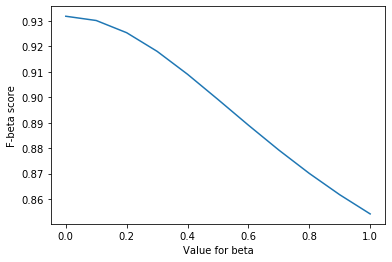

In [156]:
#precision and recall for case 0 + f-scores plot from .1-1
def re0():
    recall = cf[0,0]/(cf[0,0]+cf[0,1]+cf[0,2]) 
    return recall
re0 = (re0())
print("Recall0:", "\t",re0)
def pr0():
    precision = cf[0,0]/(cf[0,0]+cf[1,0]+cf[2,0]) 
    return precision
pr0 = (pr0())
print("Precision0:", "\t",pr0)

def f0(pr0,re0, beta=1):
    f_score = (1+beta**2)*pr0*re0/(beta**2*pr0+re0)
    return f_score 
print("F-score0:", "\t", f0(pr0,re0, beta=1))

def different_f_scores():
    beta = [x*0.1 for x in range(0,10+1)]
    plt.plot(beta, [f0(pr0, re0, beta=b) for b in beta])
    plt.xlabel("Value for beta")
    plt.ylabel("F-beta score")
different_f_scores()
#interpretation of f-beta: the higher the value of f-beta, the lower the f-score will be. Therefore more emphasis on precision

Recall1: 	 0.8823529411764706
Precision1: 	 0.8108108108108109
F-score1: 	 0.8450704225352113


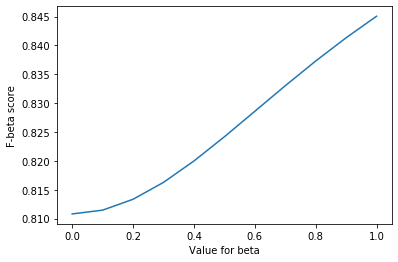

In [157]:
#precision and recall for case 1 + f-scores plot from .1-1
def re1():
    recall = cf[1,1]/(cf[1,1]+cf[1,0]+cf[1,2]) 
    return recall
re1 = (re1())
print("Recall1:", "\t",re1)
def pr1():
    precision = cf[1,1]/(cf[1,1]+cf[0,1]+cf[2,1]) 
    return precision
pr1 = (pr1())
print("Precision1:", "\t",pr1)

def f1(pr1,re1, beta=1):
    f_score = (1+beta**2)*pr1*re1/(beta**2*pr1+re1)
    return f_score 
print("F-score1:", "\t", f1(pr1,re1, beta=1))

def different_f_scores():
    beta = [x*0.1 for x in range(0,10+1)]
    plt.plot(beta, [f1(pr1, re1, beta=b) for b in beta])
    plt.xlabel("Value for beta")
    plt.ylabel("F-beta score")
different_f_scores() 
#interpretation of f-beta. The higher the value of beta, the higher the f-score will be. Therefore recall is more important.

Recall2: 	 0.8571428571428571
Precision2: 	 0.631578947368421
F-score2: 	 0.7272727272727273


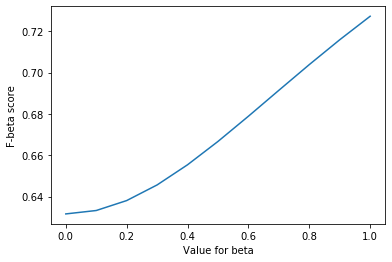

In [169]:
def re2():
    recall = cf[2,2]/(cf[2,2]+cf[2,0]+cf[2,1])
    return recall
re2 = (re2())
print("Recall2:", "\t",re2)

def pr2():
    precision = cf[2,2]/(cf[2,2]+cf[0,2]+cf[1,2])
    return precision
pr2 = (pr2())
print("Precision2:", "\t",pr2)

def f2(pr2, re2, beta=1):
    f_score = (1+beta**2)*pr2*re2/(beta**2*pr2+re2)
    return f_score 
print("F-score2:", "\t", f2(pr2, re2, beta=1))

def different_f_scores():
    beta = [x*0.1 for x in range(0,10+1)]
    plt.plot(beta, [f2(pr2, re2, beta=b) for b in beta])
    plt.xlabel("Value for beta")
    plt.ylabel("F-beta score")
different_f_scores() 
#interpretation of f-beta. The higher the value of beta, the higher the f-score will be. Therefore recall is more important.

Recall3: 	 0.8426524455936221
Precision3: 	 0.7908763308763308
F-score3: 	 0.815943843750596


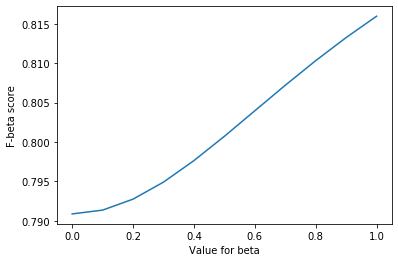

In [185]:
def re3():
    recall = (r0+r1+r2)/3 
    return recall
re3 = (re3())
print("Recall3:", "\t",re3)

def pr3():
    precision = (p0+p1+.63)/3
    return precision
pr3 = (pr3())
print("Precision3:", "\t",pr3)

def f3(pr3,re3, beta=1):
    f_score = (1+beta**2)*pr3*re3/(beta**2*pr3+re3)
    return f_score 
print("F-score3:", "\t", f3(pr3,re3, beta=1))

def different_f_scores():
    beta = [x*0.1 for x in range(0,10+1)]
    plt.plot(beta, [f3(pr3, re3, beta=b) for b in beta])
    plt.xlabel("Value for beta")
    plt.ylabel("F-beta score")
different_f_scores() 
#interpretation of f-beta. The higher the value of beta, the higher the f-score will be. Therefore recall is more important.